In [1]:
import numpy as np
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

# np.load 사용 후 반드시 아래 코드를 실행할 것!!
# np.load = np_load_old

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [154]:
np.load = np_load_old

In [155]:
train_data.shape

(25000,)

In [156]:
len(train_data[0])

218

In [157]:
len(train_data[1])

189

In [158]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [159]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [176]:
np.unique(train_labels)

array([0, 1], dtype=int64)

In [160]:
print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [161]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [162]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [163]:
from keras import models
from keras import layers

model = models.Sequential()
#model.add(layers.Dense(16, activation='relu', input_dim=(10000,))) # 16 = node
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 16 = node
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [164]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) # => 평가지표

In [165]:
# 검증데이터를 만드는 코드
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [166]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 7s 443us/step - loss: 0.5540 - acc: 0.7652 - val_loss: 0.3966 - val_acc: 0.8584
Epoch 2/10
15000/15000 [==============================] - 4s 263us/step - loss: 0.2937 - acc: 0.9007 - val_loss: 0.2918 - val_acc: 0.8891
Epoch 3/10
15000/15000 [==============================] - 4s 260us/step - loss: 0.1952 - acc: 0.9345 - val_loss: 0.2772 - val_acc: 0.8888
Epoch 4/10
15000/15000 [==============================] - 4s 257us/step - loss: 0.1440 - acc: 0.9528 - val_loss: 0.2873 - val_acc: 0.8869
Epoch 5/10
15000/15000 [==============================] - 4s 255us/step - loss: 0.1090 - acc: 0.9684 - val_loss: 0.3040 - val_acc: 0.8841
Epoch 6/10
15000/15000 [==============================] - 4s 269us/step - loss: 0.0820 - acc: 0.9791 - val_loss: 0.3288 - val_acc: 0.8818
Epoch 7/10
15000/15000 [==============================] - 4s 264us/step - loss: 0.0608 - acc: 0.9886 - val_loss: 0.3568 - 

In [167]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

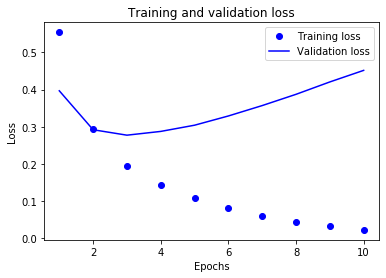

In [169]:
# epoch의 칼럼들을 이용하여 Overfitting 지점 찾기
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

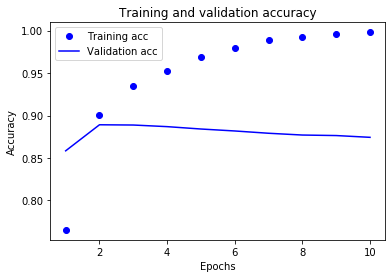

In [170]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [171]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) # => 평가지표

In [172]:
#typing
model.fit(x_train, y_train,
         epochs = 3, batch_size=512)

Epoch 1/3
25000/25000 [==============================] - 6s 233us/step - loss: 0.1827 - acc: 0.9488
Epoch 2/3
25000/25000 [==============================] - 4s 178us/step - loss: 0.1088 - acc: 0.9673
Epoch 3/3
25000/25000 [==============================] - 5s 180us/step - loss: 0.0791 - acc: 0.9780


In [173]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 6s 248us/step


In [174]:
results

[0.4311517397785187, 0.86488]

In [175]:
# 영화 리뷰가 postive 할 확률
model.predict(x_test)

array([[0.0159494 ],
       [0.99998105],
       [0.04717213],
       ...,
       [0.09454727],
       [0.02664548],
       [0.8935143 ]], dtype=float32)